In [3]:
!unzip dlschool-main.zip

Archive:  dlschool-main.zip
4a77ff9612f3938c1c4953c50768c181c95ed554
replace dlschool-main/Neural_net_demo.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import sys
import os
from os.path import join
from IPython.display import Image

In [7]:
%cd dlschool-main/
!pwd

/content/dlschool-main
/content/dlschool-main


## 활성화 함수

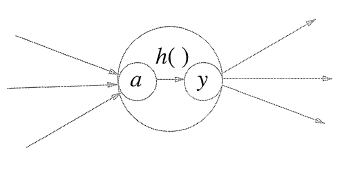

In [4]:
Image('./asset/1.PNG')

### 계단 함수 구현하기

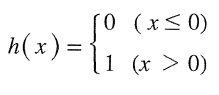

In [5]:
Image('./asset/2.PNG')

In [8]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [9]:
y = x > 0
y

array([False,  True,  True])

In [10]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

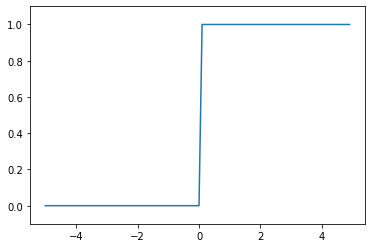

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 시그모이드 함수 구현하기

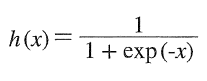

In [6]:
Image('./asset/3.PNG')

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

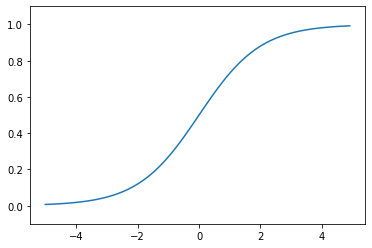

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

### 계단함수 vs 시그모이드 함수

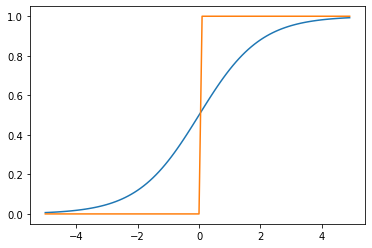

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
z = step_function(x)
plt.plot(x, y, x, z)
plt.show()

### ReLU 함수

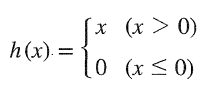

In [8]:
Image('./asset/4.PNG')

In [17]:
def relu(x):
    return np.maximum(0, x)

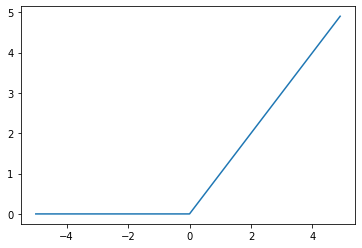

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 다차원 배열의 계산

### 다차원 배열

In [19]:
A = np.array([1, 2, 3, 4])
print('행렬 A')
print(A)
print('\n행렬 A의 차원의 수')
print(np.ndim(A))
print('\n행렬 A의 형상')
print(A.shape)

행렬 A
[1 2 3 4]

행렬 A의 차원의 수
1

행렬 A의 형상
(4,)


In [20]:
B = np.array([[1, 2],[3, 4], [5, 6]])
print('행렬 B')
print(B)
print('\n행렬 B의 차원의 수')
print(np.ndim(B))
print('\n행렬 B의 형상')
print(B.shape)

행렬 B
[[1 2]
 [3 4]
 [5 6]]

행렬 B의 차원의 수
2

행렬 B의 형상
(3, 2)


### 행렬의 내적(행렬 곱)

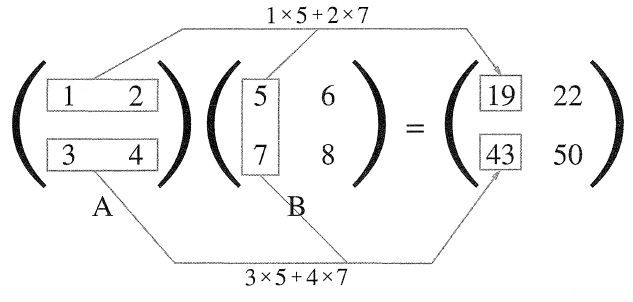

In [9]:
Image('./asset/5.PNG')

In [21]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [22]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [23]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [24]:
C = np.array([[1, 2, 3], [4, 5, 6]])
np.dot(C, A)

ValueError: ignored

### 신경망의 내적

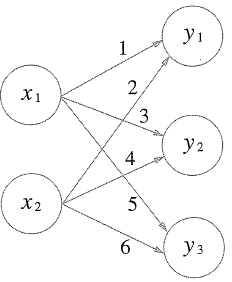

In [10]:
Image('./asset/6.PNG')

In [25]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3층 신경망 구현하기

### 각 층의 신호 전달 구현하기

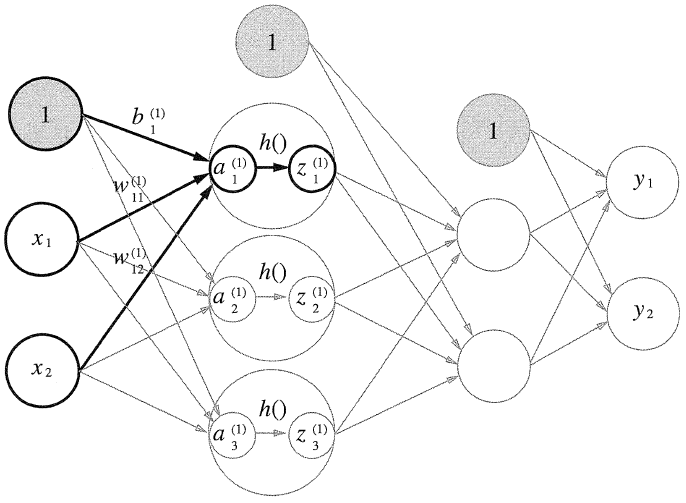

In [11]:
Image('./asset/7.PNG')

In [26]:
# 입력 -> 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

In [27]:
# 활성화 함수로 sigmoid 사용
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [28]:
# 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [29]:
#출력층의 활성화 함수
def identity_function(x):
    return x

In [30]:
# 3층
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

### 구현 정리

In [31]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [32]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [33]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 출력층 설계하기

### 항등 함수와 소프트맥스 함수 구현하기

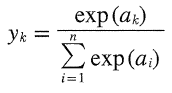

In [12]:
Image('./asset/8.PNG')

In [34]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [35]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [37]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [38]:
# 소프트 맥수 함수 구현 시 주의점
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

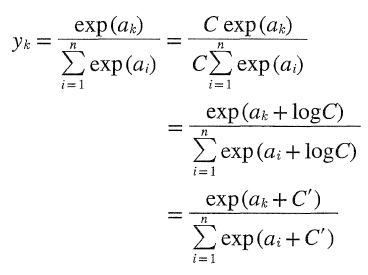

In [13]:
Image('./asset/9.PNG')

In [39]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [40]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 손글씨 숫자 인식

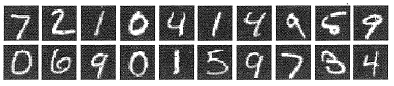

In [14]:
Image('./asset/10.PNG')

### MNIST 데이터셋

In [41]:
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True,normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [43]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
img = x_train[0]
label = y_train[0]
print(label)

5


(784,)
(28, 28)


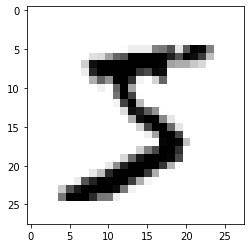

In [45]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()

### 신경망의 추론(Inference) 처리

In [46]:
import pickle
import numpy as np

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [47]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)
    
    return y

In [ ]:
network = init_network()

accuracy_cnt = 0
cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = np.argmax(y) # 확률값이 제일 높은 출력값
    if p == y_test[i]:
        accuracy_cnt += 1
    if cnt < 10:
        print('label : ' + str(y_test[i]))
        print('estimated : ' + str(p))
        plt.imshow(np.reshape(x_test[i], (28, 28)), cmap = plt.cm.binary)
        plt.show()
    cnt +=1

print("Accuracy: " + str(float(accuracy_cnt) / len(x_test)))

### 배치 처리

In [49]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x_test[0].shape)
print(W1.shape) # 입력층 -> 1층
print(W2.shape) # 1층 -> 2층
print(W3.shape) # 2층 -> 출력층

(784,)
(784, 50)
(50, 100)
(100, 10)


In [50]:
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 확률값이 제일 높은 출력값
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size]) 

print("Accuracy: " + str(float(accuracy_cnt) / len(x_test)))

Accuracy: 0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
